# GPGN409 homework 
your name: Benjamin Nguyen

In [340]:
using DataFrames, CSV
using LinearAlgebra
using Printf
using CairoMakie
using StatsBase

In [341]:
df = CSV.read("bhA.csv", DataFrame; delim=',', ignorerepeated=true);
vp = df[:, 1] ./1000
vs = df[:, 2] ./1000
ro = df[:, 3];

h = fit(Histogram, (vp,vs); nbins = (30, 30));
h1 = fit(Histogram, (vp,ro); nbins = (30, 30));
h2 = fit(Histogram, (vs,ro); nbins = (30, 30));

function extend_hist(x, y, h)

    Z_extended = zeros(Int, length(x), length(y))

    # Find the indices where the original data falls in the extended grid
    x_l = findfirst(x .>= first(h.edges[1]))
    x_r = findlast(x .<= last(h.edges[1]))
    y_l = findfirst(y .>= first(h.edges[2]))
    y_r = findlast(y .<= last(h.edges[2]))

    Z = h.weights

    # Calculate the size of the original Z matrix
    z_rows, z_cols = size(Z)

    # Ensure the subarray dimensions don't exceed the bounds of Z or Z_extended
    x_r = x_l + z_rows - 1
    y_r = y_l + z_cols - 1

    # Fill the corresponding area in the extended Z matrix with the original data
    Z_extended[x_l:x_r, y_l:y_r] .= Z

    # Return the extended Z matrix
    return Z_extended
end

# Extended grid for x and y from 1 to 5.1 with step 0.05
vp_vs = extend_hist(1:0.05:5.1, 1:0.05:5.1,h)
vp_ro = extend_hist(1:0.05:5.1, 2:0.01:3.1, h1)
vs_ro = extend_hist(1:0.05:5.1, 2:0.01:3.1, h2);

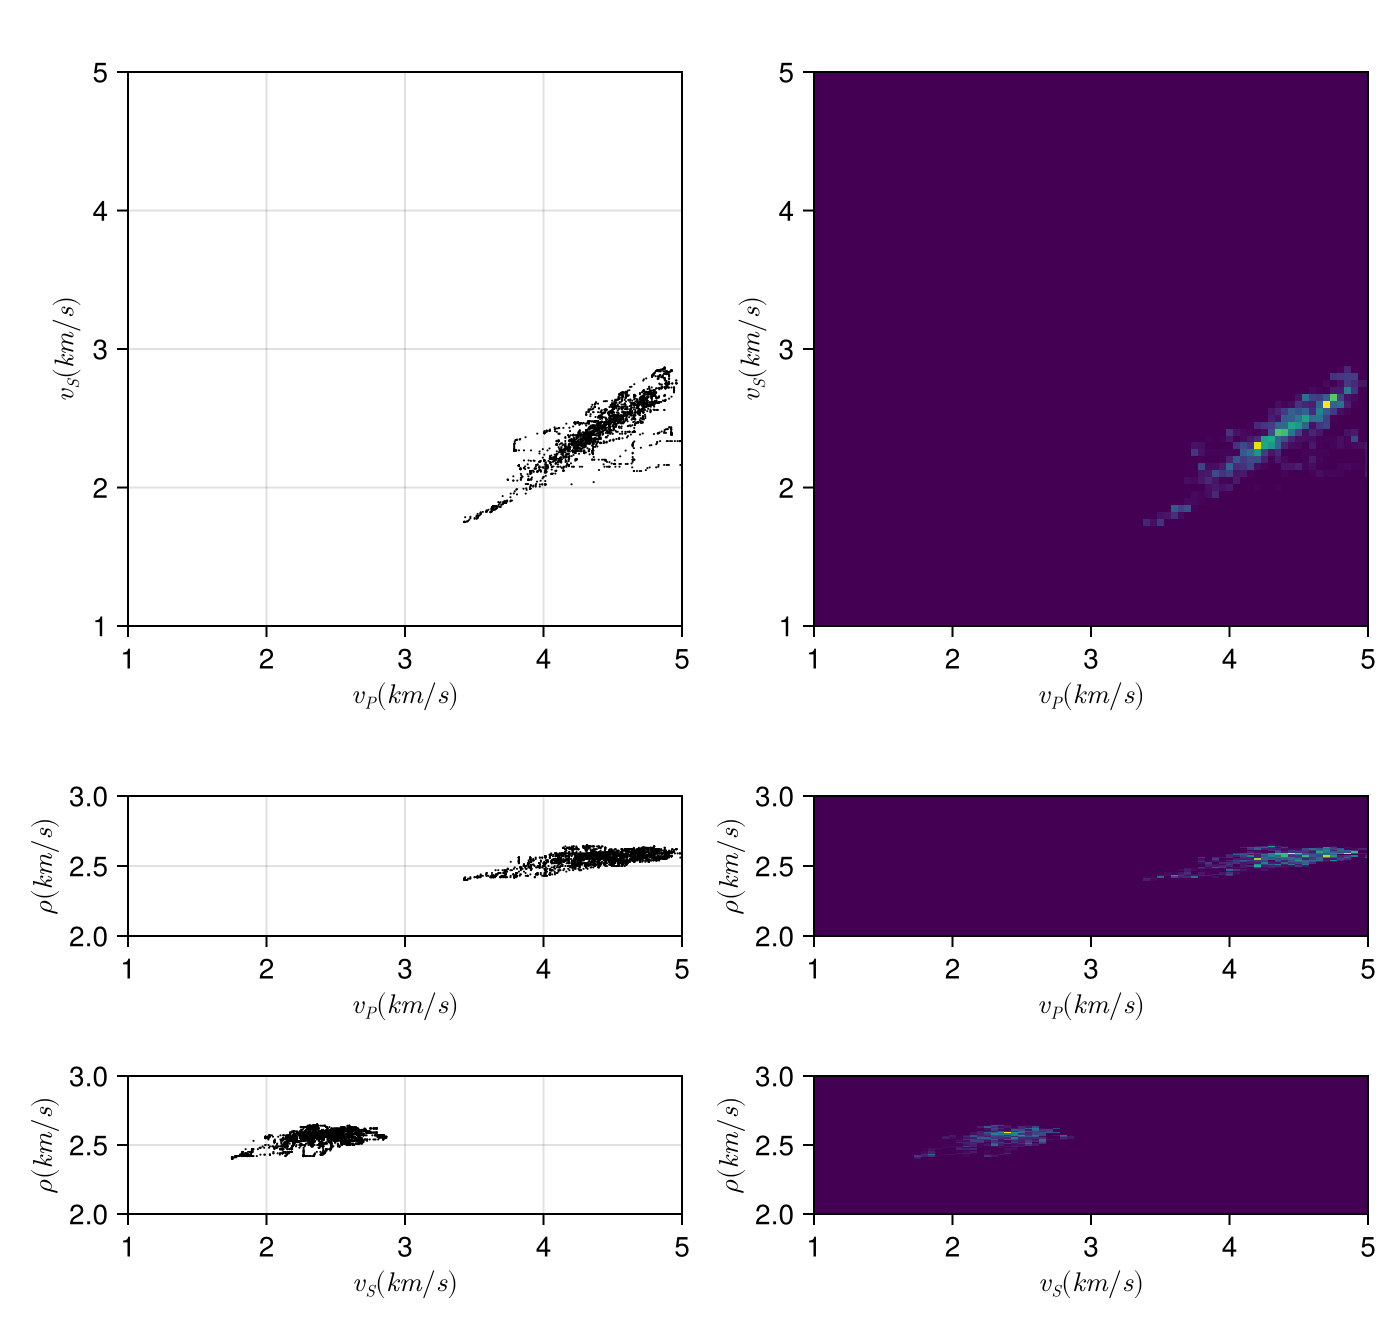

In [342]:
f = Figure(size=(700, 670))

ax1 = Axis(f[1, 1], xlabel=L"v_P (km/s)", ylabel=L"v_S (km/s)", aspect = DataAspect(), limits = (1, 5, 1, 5))
ax2 = Axis(f[2, 1], xlabel=L"v_P (km/s)", ylabel=L"\rho(km/s)", aspect = DataAspect(), limits = (1, 5, 2, 3))
ax3 = Axis(f[3, 1], xlabel=L"v_S (km/s)", ylabel=L"\rho(km/s)", aspect = DataAspect(), limits = (1, 5, 2, 3))

ax4 = Axis(f[1, 2], xlabel=L"v_P (km/s)", ylabel=L"v_S (km/s)", aspect = DataAspect(), limits = (1, 5, 1, 5))
ax5 = Axis(f[2, 2], xlabel=L"v_P (km/s)", ylabel=L"\rho(km/s)", aspect = DataAspect(), limits = (1, 5, 2, 3))
ax6 = Axis(f[3, 2], xlabel=L"v_S (km/s)", ylabel=L"\rho(km/s)", aspect = DataAspect(), limits = (1, 5, 2, 3))

scatter!(ax1, vp, vs, markersize=1.5, color=:black)
scatter!(ax2, vp, ro, markersize=1.5, color=:black)
scatter!(ax3, vs, ro, markersize=1.5, color=:black)


heatmap!(ax4, 1:0.05:5.1, 1:0.05:5.1,vp_vs)
heatmap!(ax5, 1:0.05:5.1, 2:0.01:3.1, vp_ro)
heatmap!(ax6, 1:0.05:5.1, 2:0.01:3.1, vs_ro)

rowsize!(f.layout, 1, Relative(2/3)); f

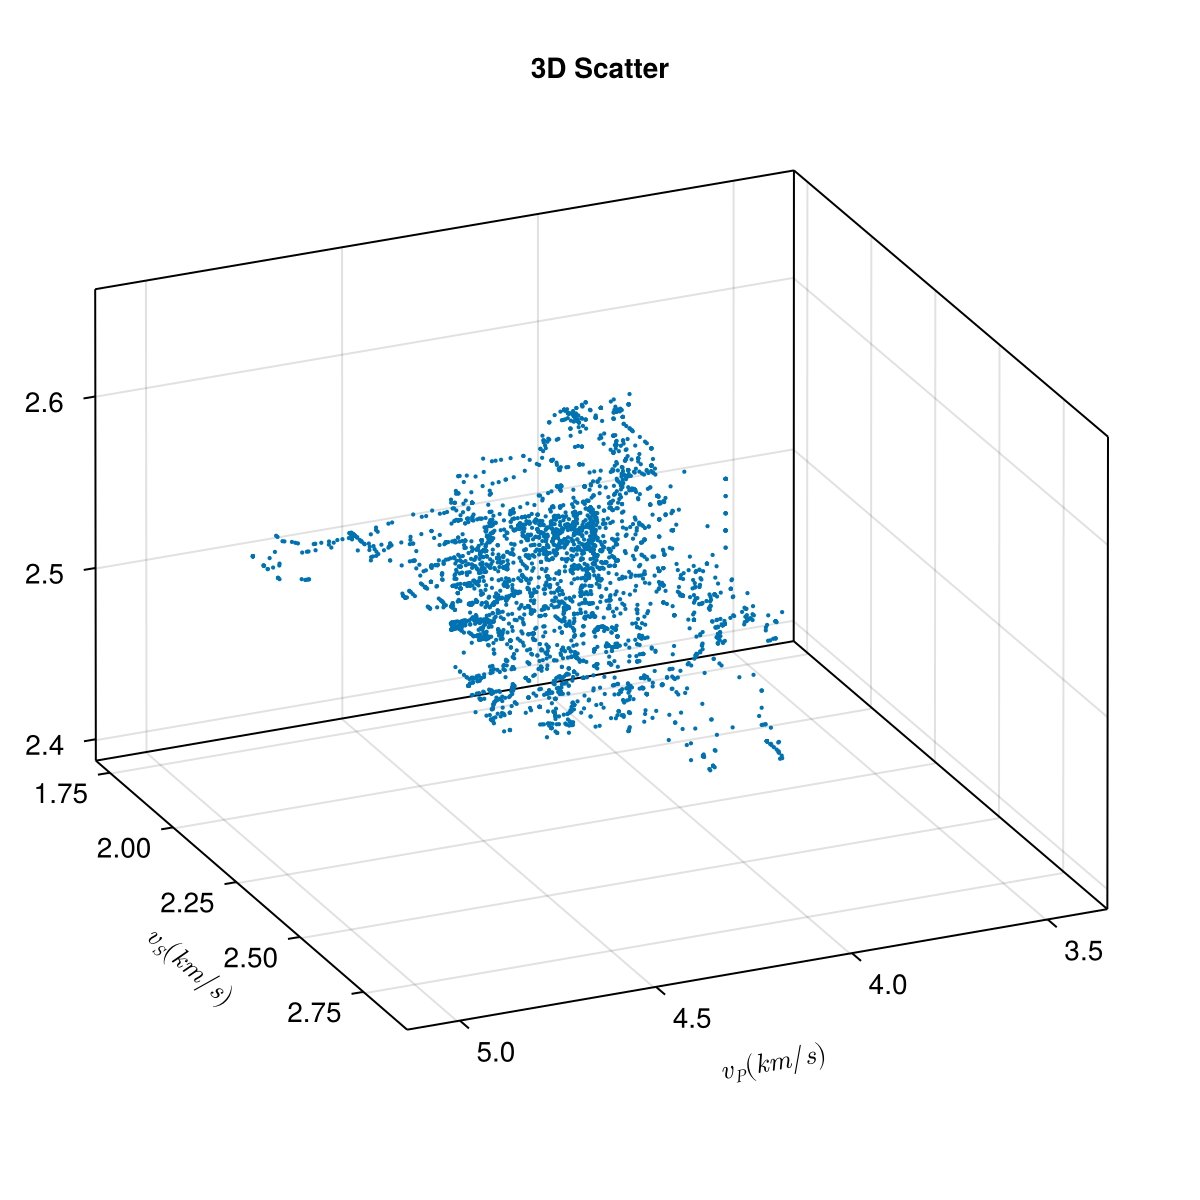

In [370]:
# Create the figure and axis for 3D plotting
fig = Figure(size = (600, 600))
ax = Axis3(fig[1, 1], title = "3D Scatter",
            xlabel=L"v_P (km/s)", ylabel=L"v_S (km/s)", zlabel = L"v_S (km/s)")

# Plot the 3D scatter
scatter!(ax, vp, vs, ro, markersize = 3)
ax.azimuth = 20  # Rotate the view horizontally

# Display the figure
fig